# Code for visualization

/var/folders/2n/c2z_t3z91gv14kc2h14sqryw0000gn/T/ipykernel_38319/1006324175.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(feature)["income"]


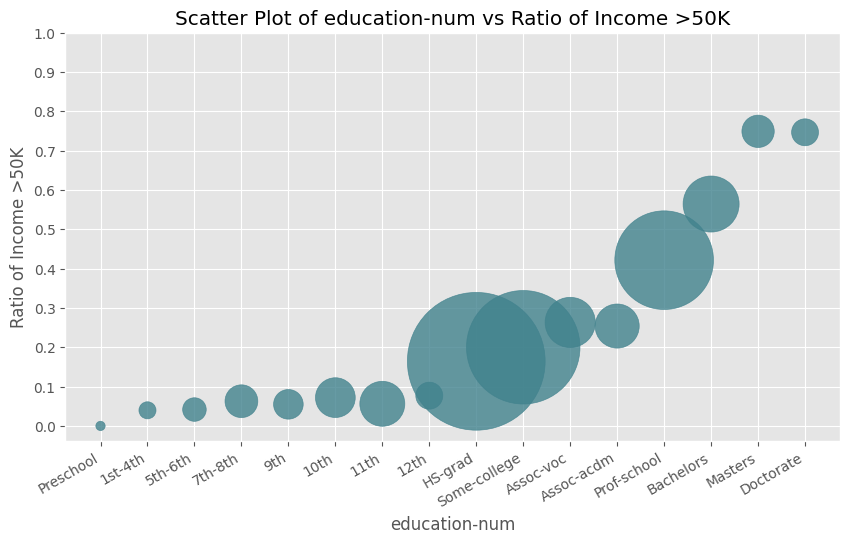

In [1]:
# User story #1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Load dataset
data = pd.read_csv('./data/adult.data', header=None, na_values=' ?')
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Handle missing data
data = data.dropna()

education_mapping = {
    1: "Preschool",
    2: "1st-4th",
    3: "5th-6th",
    4: "7th-8th",
    5: "9th",
    6: "10th",
    7: "11th",
    8: "12th",
    9: "HS-grad",
    10: "Some-college",
    11: "Assoc-voc",
    12: "Assoc-acdm",
    13: "Prof-school",
    14: "Bachelors",
    15: "Masters",
    16: "Doctorate"
}

# Replace education-num with the education level names
data['education-num'] = data['education-num'].map(education_mapping)

ordered_education_levels = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th",
    "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", 
    "Prof-school", "Bachelors", "Masters", "Doctorate"
]

data['education-num'] = pd.Categorical(
    data['education-num'], categories=ordered_education_levels, ordered=True)

# Encode the income column
data["income"] = data["income"].apply(lambda x: 1 if x == " >50K" else 0)

# Function to calculate ratio and sample size
def calculate_ratio_and_size(feature):
    grouped = data.groupby(feature)["income"]
    ratio = grouped.mean()
    size = grouped.count()
    return ratio, size

# Create scatter plots
feature = "education-num"

ratio, size = calculate_ratio_and_size(feature)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(ratio.index, ratio.values, s=size, alpha=0.8, c='#41828d')
ax.set_xlabel(feature)
ax.set_ylabel('Ratio of Income >50K')
ax.set_title(f'Scatter Plot of {feature} vs Ratio of Income >50K')
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.grid(True)

# Rotate x-axis labels for categorical features
fig.autofmt_xdate()

plt.show()


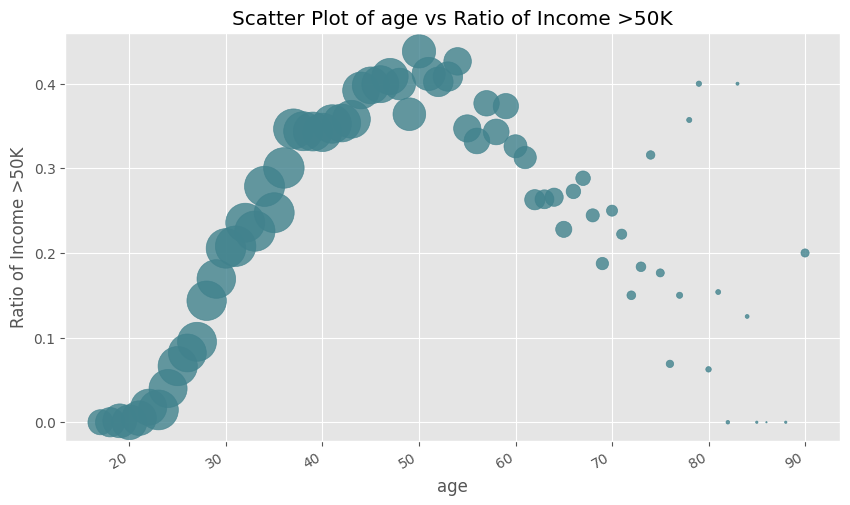

In [2]:
# User story #2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Load dataset
data = pd.read_csv('./data/adult.data', header=None, na_values=' ?')
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Handle missing data
data = data.dropna()

# Encode the income column
data["income"] = data["income"].apply(lambda x: 1 if x == " >50K" else 0)

# Function to calculate ratio and sample size
def calculate_ratio_and_size(feature):
    grouped = data.groupby(feature)["income"]
    ratio = grouped.mean()
    size = grouped.count()
    return ratio, size

# Create scatter plots
feature = "age"

ratio, size = calculate_ratio_and_size(feature)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(ratio.index, ratio.values, s=size, alpha=0.8, c='#41828d')
ax.set_xlabel(feature)
ax.set_ylabel('Ratio of Income >50K')
ax.set_title(f'Scatter Plot of {feature} vs Ratio of Income >50K')
ax.set_yticks(np.arange(0, 0.5, 0.1))
ax.grid(True)

# Rotate x-axis labels for categorical features
fig.autofmt_xdate()

plt.show()


/var/folders/2n/c2z_t3z91gv14kc2h14sqryw0000gn/T/ipykernel_38319/3597378259.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([feature1, feature2]).agg(ratio=('income', 'mean'), count=('income', 'size')).reset_index()
/var/folders/2n/c2z_t3z91gv14kc2h14sqryw0000gn/T/ipykernel_38319/3597378259.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


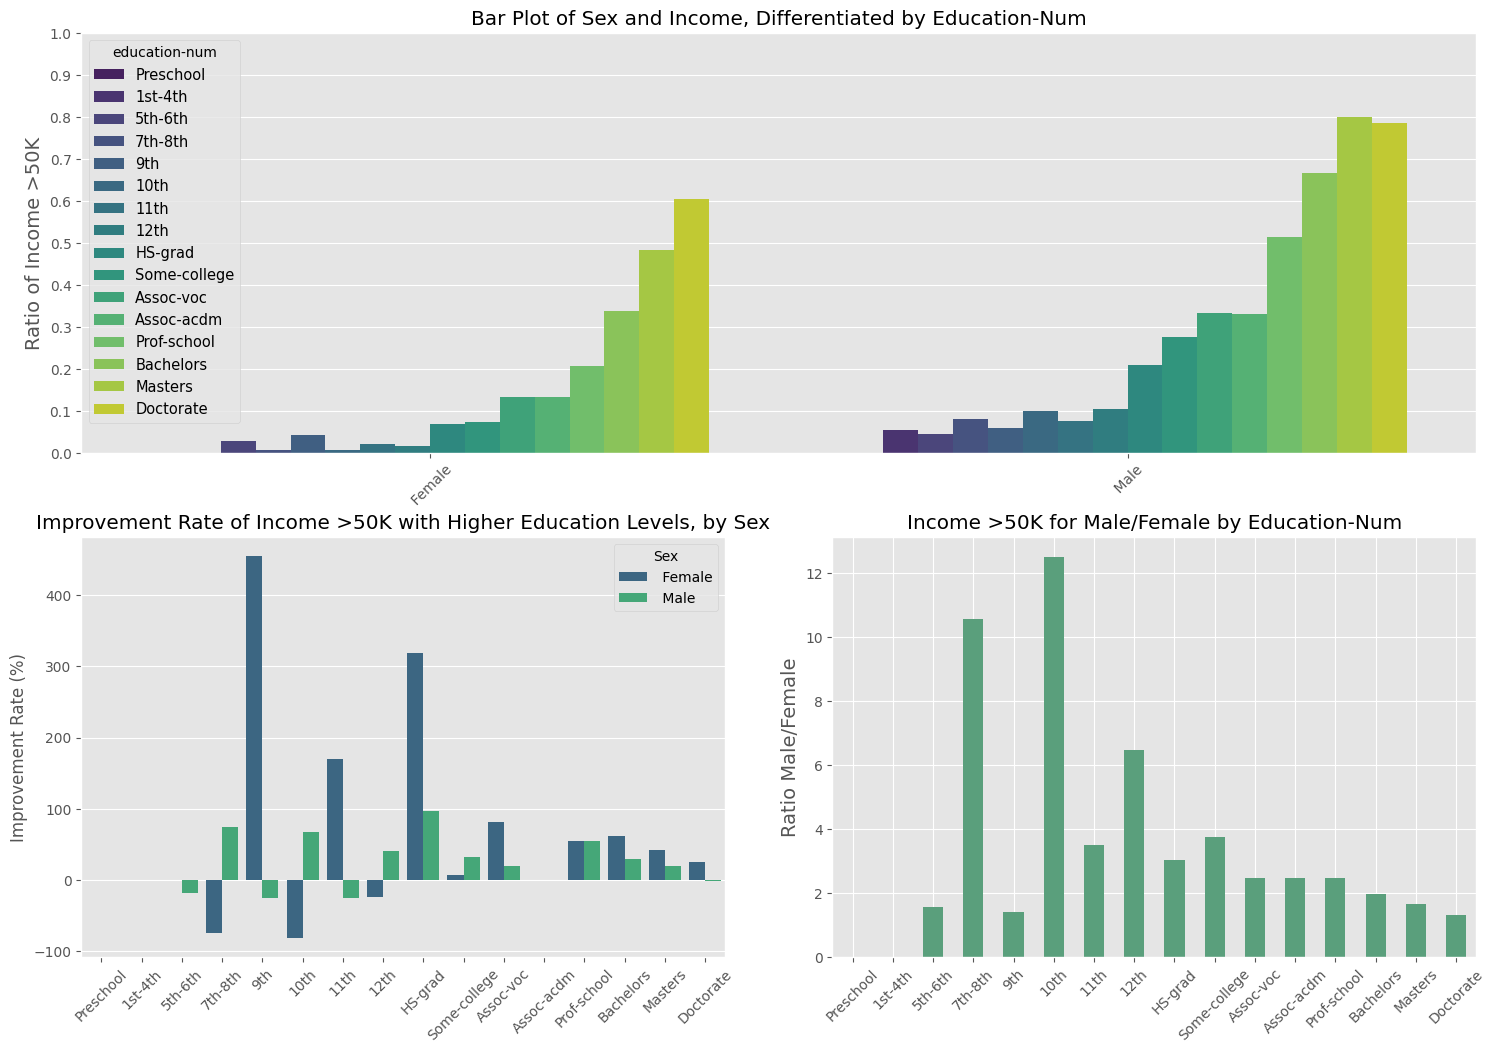

In [3]:
# User story #3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

plt.style.use('ggplot')

# Load dataset
data = pd.read_csv('./data/adult.data', header=None, na_values=' ?')
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Handle missing data
data = data.dropna()

education_mapping = {
    1: "Preschool",
    2: "1st-4th",
    3: "5th-6th",
    4: "7th-8th",
    5: "9th",
    6: "10th",
    7: "11th",
    8: "12th",
    9: "HS-grad",
    10: "Some-college",
    11: "Assoc-voc",
    12: "Assoc-acdm",
    13: "Prof-school",
    14: "Bachelors",
    15: "Masters",
    16: "Doctorate"
}

# Replace education-num with the education level names
data['education-num'] = data['education-num'].map(education_mapping)

ordered_education_levels = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th",
    "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", 
    "Prof-school", "Bachelors", "Masters", "Doctorate"
]

data['education-num'] = pd.Categorical(
    data['education-num'], categories=ordered_education_levels, ordered=True)


# Encode the income column
data["income"] = data["income"].apply(lambda x: 1 if x == " >50K" else 0)

# Select features for the plot
feature1 = "sex"
feature2 = "education-num"

# Calculate the ratio of >50K income and the count for each unique combination of the selected features
grouped = data.groupby([feature1, feature2]).agg(ratio=('income', 'mean'), count=('income', 'size')).reset_index()

# Create the subplots with gridspec
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.4, hspace=0.2)

ax1 = plt.subplot(gs[0, 0:4])
ax2 = plt.subplot(gs[1, 2:4])
ax3 = plt.subplot(gs[1, 0:2])

# First plot (Bar plot of sex and income)
sns.barplot(x=feature1, y='ratio', hue=feature2, data=grouped, palette='viridis', ax=ax1)
ax1.set_title(f'Bar Plot of Sex and Income, Differentiated by Education-Num')
ax1.set_xlabel("", fontsize=14)
ax1.set_ylabel('Ratio of Income >50K', fontsize=14)
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(title=feature2, loc='upper left', fontsize=10.5)

# Calculate the ratio of >50K income for male/female for each education-num
pivot = grouped.pivot(index=feature2, columns=feature1, values='ratio').fillna(0)
pivot['ratio_male_female'] = pivot[' Male'] / pivot[' Female']

# Second plot (Ratio of >50K for male compared to female)
pivot['ratio_male_female'].plot(kind='bar', color='#5a9f7c', ax=ax2)
ax2.set_title('Income >50K for Male/Female by Education-Num')
ax2.set_xlabel('', fontsize=14)
ax2.set_ylabel('Ratio Male/Female', fontsize=14)
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


# Calculate the improvement rate between consecutive education levels for each sex
grouped['improvement_rate'] = grouped.groupby("sex")["ratio"].pct_change() * 100
grouped = grouped.dropna()  # Drop the NaN value for the first level since it has no previous level

# Create the bar plot for improvement rates for both males and females
sns.barplot(x=feature2, y='improvement_rate', hue=feature1, data=grouped, palette='viridis', ax=ax3)

ax3.set_title('Improvement Rate of Income >50K with Higher Education Levels, by Sex')
ax3.set_xlabel('')
ax3.set_ylabel('Improvement Rate (%)')
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.legend(title='Sex', loc='upper right')

plt.tight_layout()
# plt.savefig("./figs/sex_education_num.pdf", bbox_inches='tight')
plt.show()


In [ ]:
# User story #4

/var/folders/2n/c2z_t3z91gv14kc2h14sqryw0000gn/T/ipykernel_38319/671755699.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([feature1, feature2]).agg(ratio=('income', 'mean'), count=('income', 'size')).reset_index()


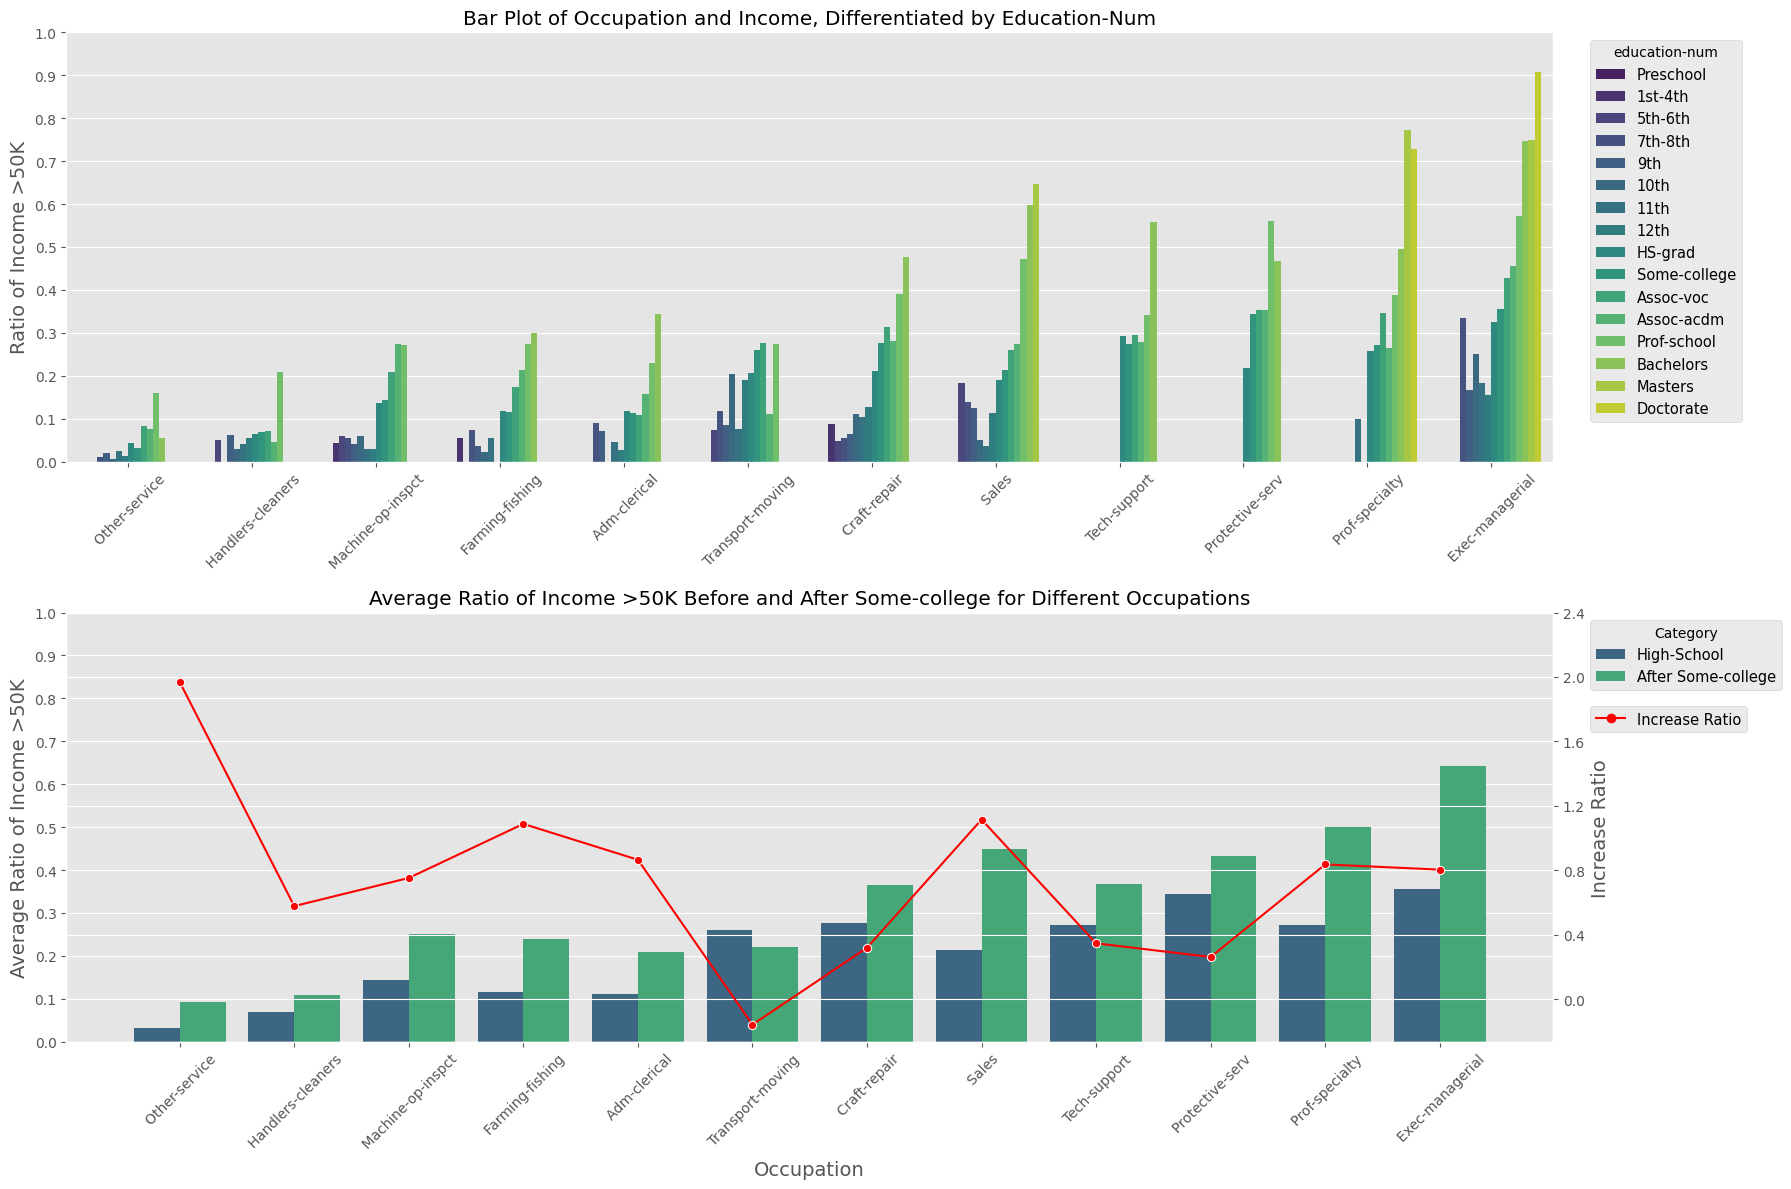

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

plt.style.use('ggplot')

# Load dataset
data = pd.read_csv('./data/adult.data', header=None, na_values=' ?')
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Handle missing data
data = data.dropna()

education_mapping = {
    1: "Preschool",
    2: "1st-4th",
    3: "5th-6th",
    4: "7th-8th",
    5: "9th",
    6: "10th",
    7: "11th",
    8: "12th",
    9: "HS-grad",
    10: "Some-college",
    11: "Assoc-voc",
    12: "Assoc-acdm",
    13: "Prof-school",
    14: "Bachelors",
    15: "Masters",
    16: "Doctorate"
}

# Replace education-num with the education level names
data['education-num'] = data['education-num'].map(education_mapping)

ordered_education_levels = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th",
    "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", 
    "Prof-school", "Bachelors", "Masters", "Doctorate"
]

data['education-num'] = pd.Categorical(
    data['education-num'], categories=ordered_education_levels, ordered=True)

# Encode the income column
data["income"] = data["income"].apply(lambda x: 1 if x == " >50K" else 0)

# Remove "Priv-house-serv" from the dataset
data = data[data['occupation'] != " Priv-house-serv"]

# Select features for the plot
feature1 = "occupation"
feature2 = "education-num"

# Calculate the ratio of >50K income and the count for each unique combination of the selected features
grouped = data.groupby([feature1, feature2]).agg(ratio=('income', 'mean'), count=('income', 'size')).reset_index()

# Filter out combinations with counts less than 10
grouped = grouped[grouped['count'] >= 10]

# Sort the data by occupation and ratio for consistent order
grouped = grouped.sort_values(by=['ratio', feature1])

# Determine the order of occupations based on the average ratio
occupation_order = grouped.groupby('occupation')['ratio'].mean().sort_values().index

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# First plot (Bar plot of occupation and income)
sns.barplot(x=feature1, y='ratio', hue=feature2, data=grouped, palette='viridis', ax=ax1, order=occupation_order)
ax1.set_title(f'Bar Plot of Occupation and Income, Differentiated by Education-Num')
ax1.set_xlabel("", fontsize=14)
ax1.set_ylabel('Ratio of Income >50K', fontsize=14)
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(title=feature2, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10.5)

# Calculate average ratios before and after "Some-college" for each occupation
before_some_college = ordered_education_levels[9:10]  # "HS-grad"
after_some_college = ordered_education_levels[10:]  # From "Assoc-voc" onwards

avg_ratios = []
increase_ratios = []

for occupation in occupation_order:
    # Filter data for the current occupation and apply count threshold
    occupation_data = grouped[grouped[feature1] == occupation]
    
    if occupation_data.empty:
        continue
    
    before_avg_ratio = occupation_data[occupation_data[feature2].isin(before_some_college)]['ratio'].mean()
    after_avg_ratio = occupation_data[occupation_data[feature2].isin(after_some_college)]['ratio'].mean()
    
    increase_ratio = (after_avg_ratio - before_avg_ratio) / before_avg_ratio if before_avg_ratio > 0 else np.nan
    
    avg_ratios.append([occupation, 'High-School', before_avg_ratio])
    avg_ratios.append([occupation, 'After Some-college', after_avg_ratio])
    increase_ratios.append([occupation, increase_ratio])

avg_ratios_df = pd.DataFrame(avg_ratios, columns=['Occupation', 'Category', 'Average Ratio']).dropna()
increase_ratios_df = pd.DataFrame(increase_ratios, columns=['Occupation', 'Increase Ratio']).dropna()

# Second plot (Bar plot of average ratios and increase ratio)
sns.barplot(x='Occupation', y='Average Ratio', hue='Category', data=avg_ratios_df, palette='viridis', ax=ax2, order=occupation_order)
ax2.set_title(f'Average Ratio of Income >50K Before and After Some-college for Different Occupations')
ax2.set_xlabel("Occupation", fontsize=14)
ax2.set_ylabel('Average Ratio of Income >50K', fontsize=14)
ax2.set_yticks(np.arange(0, 1.1, 0.1))
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10.5)

# Plot the increase ratio
ax2_secondary = ax2.twinx()
lineplot = sns.lineplot(x='Occupation', y='Increase Ratio', data=increase_ratios_df, color='red', marker='o', ax=ax2_secondary, sort=False)
ax2_secondary.set_ylabel('Increase Ratio', fontsize=14)
ax2_secondary.set_yticks(np.arange(0, max(increase_ratios_df['Increase Ratio']) + 0.8, 0.4))

# Add legend for the line plot
red_patch = plt.Line2D([0], [0], color='red', marker='o', linestyle='-', label='Increase Ratio')
ax2_secondary.legend(handles=[red_patch], loc='upper left', bbox_to_anchor=(1.02, 0.8), fontsize=10.5)

plt.tight_layout()
# plt.savefig("./figs/occupation_education_num_avg_increase.pdf", bbox_inches='tight')
plt.show()
